## A/B Testing

A/B testing plays a critical role in decision-making processes across various industries. It is a method of comparing and testing the effectiveness and benefits of two (or more) different business strategies and finding the strategy that works best. Running A/B testing helps businesses save time and money that could have been wasted if the chosen strategy didn't work.

In marketing, A/B tests can be used in many areas:

- improving email open rates,
- advertisements on social media,
- product recommendations on your web page,
- testing different pictures or descriptions of your product and many more.

## About data

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

## Goal

Evaluate A/B testing results from this dataset and decide which marketing strategy works the best and has [statistically significant](https://en.wikipedia.org/wiki/Statistical_significance) differences among the test groups.

## Data Analysis

In this analysis, I'm going to focus on the distribution of different variables of this data set. I need to make sure that the attributes of each promotion group are symmetrically distributed so that the results of this A/B testing are fair and correct. Let's load our libraries and data and check the distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
fastfood = pd.read_csv('WA_Marketing_Campaign.csv')
fastfood.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
# Grouping data by Promotion
salesDist = fastfood.groupby('Promotion').sum('SalesInThousands')
salesDist['Percentage'] = salesDist['SalesInThousands']/sum(salesDist['SalesInThousands'])*100

salesDist

,MarketID,LocationID,AgeOfStore,week,SalesInThousands,Percentage
Promotion,,,,,,
1,996,84016,1424,430,9993.03,34.106510
2,1108,93520,1500,470,8897.93,30.368901
3,1028,85316,1736,470,10408.52,35.524590


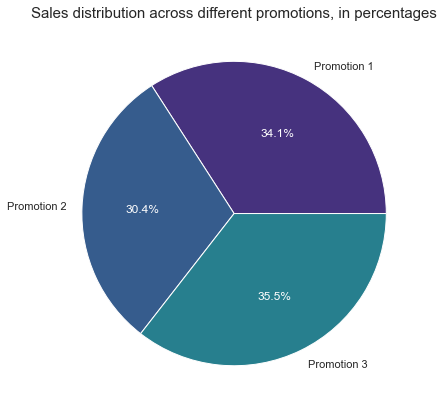

In [36]:
# Visualizing data
sns.set(rc={"figure.figsize":(7, 7)})
palette = sns.color_palette('viridis')

_, _, autotexts = plt.pie(salesDist['Percentage']
                            , labels = ['Promotion 1','Promotion 2','Promotion 3']
                            , colors = palette
                            , autopct='%1.1f%%')

for ins in autotexts: 
    ins.set_color('white')

plt.title("Sales distribution across different promotions, in percentages", fontsize=15)
plt.show()

As we can see from this chart, the promotion group 3 has the largest aggregate sales amount (36%). However, each promotion group takes roughly one third of the total sales during the promotion weeks.

Let's look at the market sizes in each promotion group.

In [39]:
marketSize = fastfood.groupby(['Promotion','MarketSize']).count()
marketSize

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


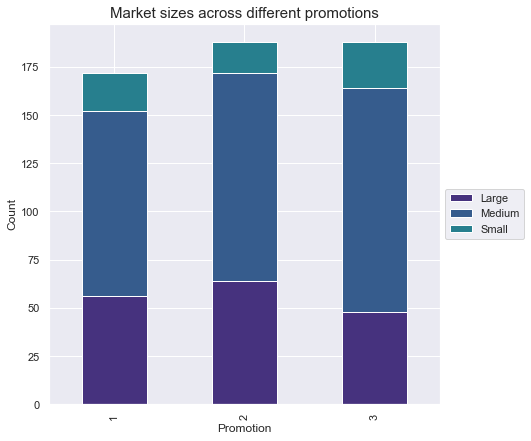

In [49]:
sns.set(rc={"figure.figsize":(7, 7)})
palette = sns.color_palette('viridis')

# Ploting with stacked true and the unstack version of marketSize df
marketSize.unstack(level=-1)['MarketID'].plot(kind='bar'
                                              , stacked=True
                                              , color=palette)


# labels for x & y axis, and legend
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
 
# title of plot
plt.title('Market sizes across different promotions', fontsize=15)
plt.show()

Here we see that the medium market size occupies the most among all three promotion groups, while the small market size occupies the least.

Now I'm going to explore the AgeOfStore column:

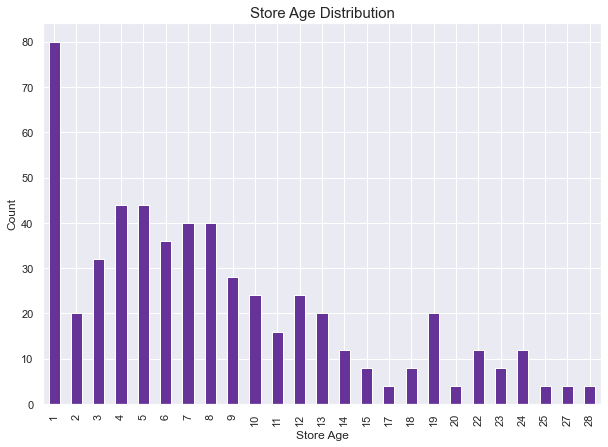

In [57]:
sns.set(rc={"figure.figsize":(10, 7)})
fastfood.groupby('AgeOfStore').count()['MarketID'].plot(kind='bar', color='rebeccapurple')

# labels for x & y axis, and legend
plt.xlabel('Store Age')
plt.ylabel('Count')
 
# title of plot
plt.title('Store Age Distribution', fontsize=15)
plt.show()

The majority of stores are 10 years old or less. A large number of stores are 1 year old. Let's look at the age of stores in different promotion groups.

In [62]:
fastfood.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


We see that all three groups seem to have store age profiles. The average ages (Mean) of stores for the three groups are 8-9 years old and the majority of the stores are 10-12 years old or younger.

After exploring the distribution of the variables in the three promotion groups, I can verify that the sample groups are similar and the A/B testing results will be meaningful and trustworthy.

#### Hypothesis testing

As I mentioned before, it's important to test your hypothesis and seek statistically significant differences among test groups when you run A/b tests. T-test is frequently used for that. The t-test compares the two averages and examines whether they are significantly different from each other.

There are two important statistics in a t-test - the t-value and p-value. The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between two testing groups. P-value measures the probability that the result would occur by chance. So the smaller the p-value is, the more statistically significant difference there is between two testing groups.

There is a concept of the null hypothesis and the alternate hypothesis. The null hypothesis states that the two groups show no statistically significant difference. The alternte hypothesis states the two groups shows a statistically significant difference.

##### Computing the t-value and p-value from the equations
There are three things we need to compute to ger the t-value: the mean, the standard deviation, and the number of samples.

In [66]:
promo1 = fastfood[fastfood['Promotion']==1]['SalesInThousands']
promo2 = fastfood[fastfood['Promotion']==2]['SalesInThousands']
promo3 = fastfood[fastfood['Promotion']==3]['SalesInThousands']

In [90]:
import numpy as np
from scipy.stats import ttest_ind

res = ttest_ind(promo1.array, promo2.array)

print(res)

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)


We got the t-value of 6.4536 and p-value of 3.5506e-10 (which is an extremely small number) that suggest that there is strong evidence against the null hypothesis and that the difference between promotion 1 and promotion 2 is significant and promotion 1 outperform promotion 2.

In [91]:
res = ttest_ind(promo1.array, promo3.array)

print(res)

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)


Here we got the t-value of 1.5551 and the p-value of 0.1207 (which is much higher than 0.05). This result suggests that there is no statistically significant difference between promotion groups 1 and 3 even though the average sales from promotion group 1 (58.1) is higher than in group 3 (55.36).

From this evaluation, I can say that promotion 1 and promotion 3 perform better than promotion 2, but the difference between promotion 1 and promotion 3 is not statistically significant. So the company can use both 1 and 2 marketing strategies for their fast-food retail chain.

#### Summary
A/B testing is a powerful technique that businesses can use to evaluate new ideas and marketing strategies before fully committing to one or another. In this analysis, I found that the company should use promotion strategies 1 or 2 to maximize their sales.